### **EDA**

## Librerias

In [ ]:
import os
import json
import gzip
import pandas as pd
import numpy as np
import string

from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk.probability import FreqDist

from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

from sklearn.manifold import TSNE

from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Cargar datos

In [ ]:
!wget href	https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Video_Games.json.gz

--2024-03-28 11:43:55--  http://href/
Resolving href (href)... failed: Name or service not known.
wget: unable to resolve host address ‘href’
--2024-03-28 11:43:55--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Video_Games.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522823613 (499M) [application/x-gzip]
Saving to: ‘Video_Games.json.gz’

Video_Games.json.gz 100%[===================>] 498.60M  39.5MB/s    in 13s     

2024-03-28 11:44:08 (39.3 MB/s) - ‘Video_Games.json.gz’ saved [522823613/522823613]

FINISHED --2024-03-28 11:44:08--
Total wall clock time: 13s
Downloaded: 1 files, 499M in 13s (39.3 MB/s)


In [ ]:
data = []
with gzip.open('Video_Games.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

print(len(data))

print(data[0])

2565349
{'overall': 1.0, 'verified': True, 'reviewTime': '06 9, 2014', 'reviewerID': 'A21ROB4YDOZA5P', 'asin': '0439381673', 'reviewerName': 'Mary M. Clark', 'reviewText': 'I used to play this game years ago and loved it. I found this did not work on my computer even though it said it would work with Windows 7.', 'summary': 'Did not like this', 'unixReviewTime': 1402272000}


In [ ]:
df = pd.DataFrame.from_dict(data)

print(len(df))

2565349


In [ ]:
df.shape

(2565349, 12)

In [ ]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


Se crea un nuevo data con 10000 muestras.

In [ ]:
data = df[:10000]

In [ ]:
data.shape

(10000, 12)

Se revisan las columnas que contiene el DF

In [ ]:
data.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

Se crea un nuevo dataframe con solo las columnas que interesan 'reviewText' y 'overall'.

In [ ]:
data = data[['reviewText','overall']]
data.head(5)

,reviewText,overall
0,I used to play this game years ago and loved i...,1.0
1,The game itself worked great but the story lin...,3.0
2,I had to learn the hard way after ordering thi...,4.0
3,The product description should state this clea...,1.0
4,I would recommend this learning game for anyon...,4.0


In [ ]:
data.shape

(10000, 2)

Se comprueban los NA.

In [ ]:
data.isna().sum()

reviewText    3
overall       0
dtype: int64

'reviewText' contienen 3 NA. Vamos a proceder a eliminarlos.

In [ ]:
data = data.dropna()
data.isna().sum()

reviewText    0
overall       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  9997 non-null   object 
 1   overall     9997 non-null   float64
dtypes: float64(1), object(1)
memory usage: 234.3+ KB


Eliminación de signos de puntuación y cambio de mayusculas a minusculas.

In [ ]:
table = str.maketrans('', '', string.punctuation)

data['reviewText'] = data['reviewText'].apply(lambda x: x.translate(table).lower())

print(data['reviewText'][:15])

0     i remember playing this when i was twelve the ...
1     the speed of charging is extremely fast shippe...
2     its a great game it has some of the classic st...
3     when i received the unit one of the rca plugs ...
4     total ripoff this dance mat was not a true ddr...
5     this was wonderful service i ordered the game ...
6     i give this five stars because i only ordered ...
7                                        excellent item
8     i like it but on the inside i have to clean it...
9     this memory card works but i have to take it o...
10    bought this when i couldnt find my old game sy...
11    very fun to play as your favorite characters i...
12    the game boy was a gloriously fantastic handhe...
13    this game disc was supposed to be an original ...
14    i was only a kid when pokemon came out i remem...
Name: reviewText, dtype: object


En el corpus aparecen números que vamos a convertir a texto.

In [ ]:
from num2words import num2words

In [ ]:
def convertir_numeros_a_palabras(texto):
    palabras = texto.split()
    return ' '.join([num2words(palabra, lang='en', ordinal=False) if palabra.isdigit() else palabra for palabra in palabras])

data['reviewText'] = data['reviewText'].apply(convertir_numeros_a_palabras)

## Cardinalidad del vocabulario.

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
tokens = []
for i in data.index:
  tokens.append(data['reviewText'][i])
words_str = str(tokens)
words = words_str.lower().split()
cont = Counter(words)
print("{} tokens en dataset".format(len(cont)))

27807 tokens en dataset


Se revisan las palabras mas comunes y su frecuencia.

In [ ]:
word_common = cont.most_common(15)
word_common

[('the', 40747),
 ('and', 23116),
 ('a', 18403),
 ('to', 18234),
 ('game', 15476),
 ('it', 15300),
 ('i', 14779),
 ('of', 14091),
 ('is', 14068),
 ('you', 12138),
 ('this', 11556),
 ('in', 9240),
 ('for', 7808),
 ('that', 7270),
 ('but', 5982)]

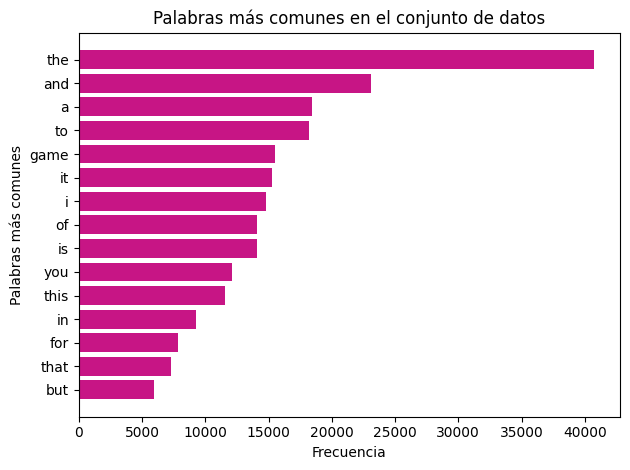

In [ ]:
words_common = [w[0] for w in word_common]
freq = [w[1] for w in word_common]

freq, words_common = zip(*sorted(zip(freq, words_common)))

plt.barh(words_common, freq, color = 'mediumvioletred')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras más comunes')
plt.title('Palabras más comunes en el conjunto de datos')
plt.tight_layout()
plt.show()

Las palabras con mas frecuencia son stopwords.

In [ ]:
!pip install stop_words

In [ ]:
from stop_words import get_stop_words

sw_list = get_stop_words(language="en")
print(sw_list)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [ ]:
word_no_sw_list = [word for word in words if word not in sw_list]

word_clean = Counter(word_no_sw_list)
word_common = word_clean.most_common(15)
word_common

[('game', 15476),
 ('one', 5001),
 ('games', 3682),
 ('like', 3156),
 ('great', 3025),
 ('get', 2965),
 ('can', 2899),
 ('play', 2753),
 ('just', 2682),
 ('time', 2607),
 ('good', 2450),
 ('fun', 2124),
 ('two', 2110),
 ('will', 2102),
 ('first', 1881)]

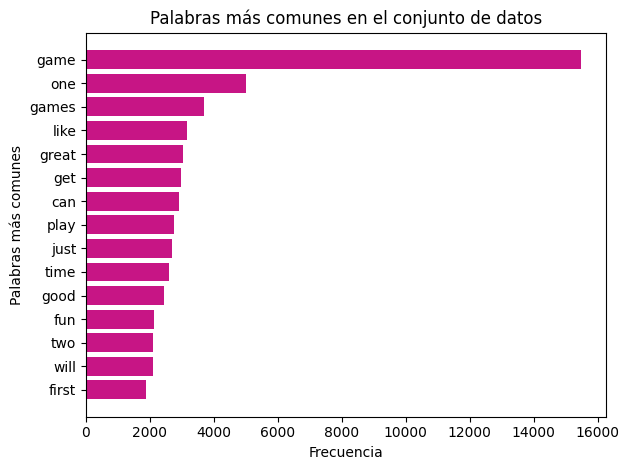

In [ ]:
words_common = [w[0] for w in word_common]
freq = [w[1] for w in word_common]

freq, words_common = zip(*sorted(zip(freq, words_common)))

plt.barh(words_common, freq, color = 'mediumvioletred')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras más comunes')
plt.title('Palabras más comunes en el conjunto de datos')
plt.tight_layout()
plt.show()

## Distribución de reviews por número de estrellas

In [ ]:
frequency = data.groupby(['overall']).count()
print(frequency)

         reviewText  Class
overall                   
1               913    913
2               328    328
3               635    635
4              1443   1443
5              6678   6678


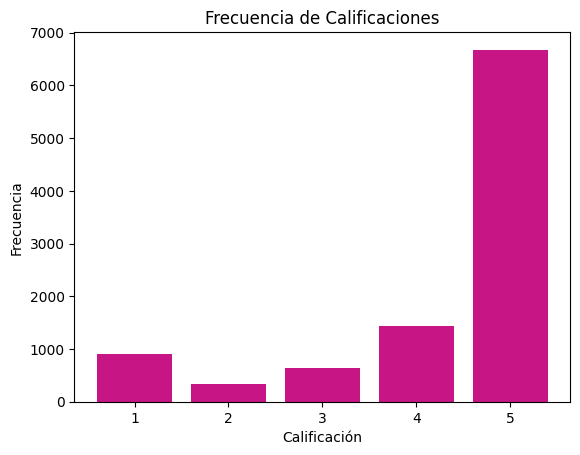

In [ ]:
plt.bar(frequency.index, frequency['reviewText'], color='mediumvioletred')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Calificaciones')
plt.xticks(frequency.index)

plt.show()

La mayoría de los videojuegos tienen una puntuación con 5 estrellas.

## Nº de reviews positivas y negativas

Se clasifican las reviews en dos grupos, positivas y negativas.
* Negativas(0): 1, 2 y 3 estrellas.
* Positivas(1): 4 y 5 estrellas.

Se comprueba que 'overall' contiene datos de 1 a 5.

In [ ]:
unique_ratings = set(data['overall'])
print(unique_ratings)

{1, 2, 3, 4, 5}


In [ ]:
data.head(5)

,reviewText,overall,Class
0,i love this game and the product i bought is e...,5,1
1,works as described good condition charged devi...,5,1
2,ill start with the goods first of all its nice...,4,1
3,played this game with my kids many yrs ago lov...,5,1
4,i bought this as a gift for my girlfriend she ...,4,1


Se clasifica 'overall' en positiva o negativa.

In [ ]:
def overall_class(row):
  if int (row['overall']) < 4:
    return 0
  else:
    return 1

In [ ]:
data['Class'] = data.apply(lambda row: overall_class(row), axis=1)

data.head(10)

,reviewText,overall,Class
0,i love this game and the product i bought is e...,5,1
1,works as described good condition charged devi...,5,1
2,ill start with the goods first of all its nice...,4,1
3,played this game with my kids many yrs ago lov...,5,1
4,i bought this as a gift for my girlfriend she ...,4,1
5,my son is in heaven product was as described,5,1
6,everything was great,5,1
7,beetle adventure racing is a fun racing game f...,5,1
8,fits the wii perfectly nice and tight the rca ...,5,1
9,i dont own the game but my cousin has it and i...,5,1


Se revisa la frecuencia.

In [ ]:
freq_class = data.groupby(['Class']).count()
print(freq_class)

       reviewText  overall
Class                     
0            1876     1876
1            8121     8121


<Axes: title={'center': 'Cantidad de reviews por clase'}, xlabel='Class'>

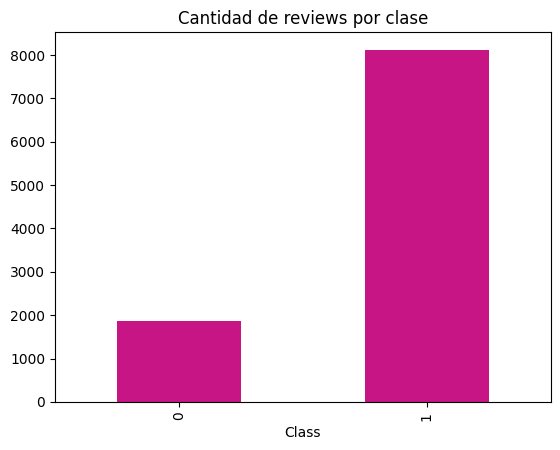

In [ ]:
freq_class["overall"].plot(kind='bar', title='Cantidad de reviews por clase', color='mediumvioletred')


## N-grams más frecuentes

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

In [ ]:
bigramas = list(ngrams(words, 2))
trigramas = list(ngrams(words, 3))

***Bigramas:***

In [ ]:
len(bigramas)

766033

In [ ]:
bigramas[:15]

[("['i", 'love'),
 ('love', 'this'),
 ('this', 'game'),
 ('game', 'and'),
 ('and', 'the'),
 ('the', 'product'),
 ('product', 'i'),
 ('i', 'bought'),
 ('bought', 'is'),
 ('is', 'effective'),
 ('effective', 'im'),
 ('im', 'very'),
 ('very', 'happy'),
 ('happy', 'with'),
 ('with', 'it')]

In [ ]:
bigrams_freq = FreqDist(bigramas)

In [ ]:
bigrams_common = bigrams_freq.most_common(15)
bigrams_common

[(('this', 'game'), 4871),
 (('of', 'the'), 3916),
 (('the', 'game'), 3909),
 (('in', 'the'), 2354),
 (('game', 'is'), 1985),
 (('if', 'you'), 1916),
 (('is', 'a'), 1894),
 (('it', 'is'), 1637),
 (('and', 'the'), 1628),
 (('the', 'best'), 1454),
 (('you', 'can'), 1408),
 (('on', 'the'), 1403),
 (('for', 'the'), 1388),
 (('to', 'the'), 1383),
 (('this', 'is'), 1308)]

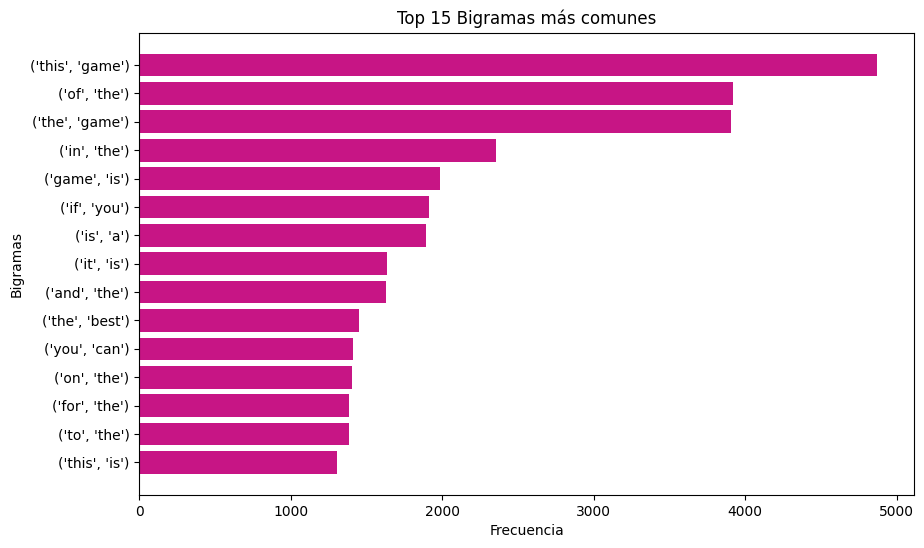

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh([str(bg[0]) for bg in bigrams_common], [bg[1] for bg in bigrams_common], color='mediumvioletred')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.title('Top 15 Bigramas más comunes')
plt.gca().invert_yaxis()
plt.show()

Se analiza los bigramas sin stopwords.

In [ ]:
bigramas_clean = list(ngrams(word_no_sw_list, 2))

In [ ]:
len(bigramas_clean)

413656

In [ ]:
bigramas_clean[:15]

[("['i", 'love'),
 ('love', 'game'),
 ('game', 'product'),
 ('product', 'bought'),
 ('bought', 'effective'),
 ('effective', 'im'),
 ('im', 'happy'),
 ('happy', 'recommend'),
 ('recommend', 'anyone'),
 ('anyone', 'wants'),
 ('wants', "it',"),
 ("it',", "'works"),
 ("'works", 'described'),
 ('described', 'good'),
 ('good', 'condition')]

In [ ]:
bigrams_freq_clean = FreqDist(bigramas_clean)
bigrams_clean_common = bigrams_freq_clean.most_common(15)
bigrams_clean_common

[(("'this", 'game'), 557),
 (('one', 'thousand'), 503),
 (('nine', 'hundred'), 464),
 (('one', 'hundred'), 409),
 (('thousand', 'nine'), 386),
 (('great', 'game'), 357),
 (('two', 'thousand'), 348),
 (('one', 'best'), 339),
 (('game', 'boy'), 335),
 (('super', 'mario'), 334),
 (('game', 'ever'), 323),
 (('nintendo', 'sixtyfour'), 316),
 (('video', 'game'), 293),
 (('game', 'play'), 279),
 (('play', 'game'), 268)]

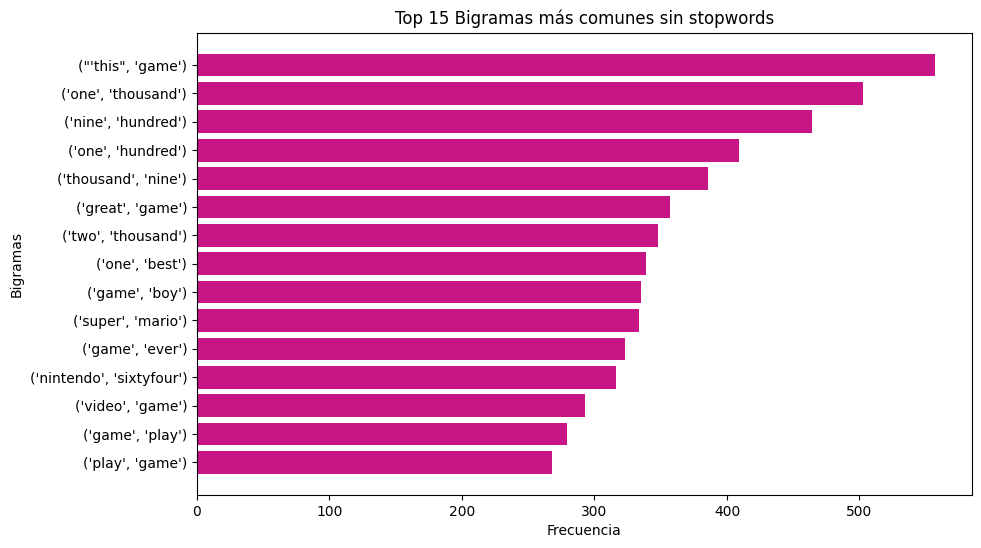

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh([str(bg[0]) for bg in bigrams_clean_common], [bg[1] for bg in bigrams_clean_common], color='mediumvioletred')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.title('Top 15 Bigramas más comunes sin stopwords')
plt.gca().invert_yaxis()
plt.show()

***Trigramas:***

In [ ]:
len(trigramas)

766032

In [ ]:
trigramas[:15]

[("['i", 'love', 'this'),
 ('love', 'this', 'game'),
 ('this', 'game', 'and'),
 ('game', 'and', 'the'),
 ('and', 'the', 'product'),
 ('the', 'product', 'i'),
 ('product', 'i', 'bought'),
 ('i', 'bought', 'is'),
 ('bought', 'is', 'effective'),
 ('is', 'effective', 'im'),
 ('effective', 'im', 'very'),
 ('im', 'very', 'happy'),
 ('very', 'happy', 'with'),
 ('happy', 'with', 'it'),
 ('with', 'it', 'i')]

In [ ]:
trigrams_freq = FreqDist(trigramas)

In [ ]:
trigrams_common = trigrams_freq.most_common(15)
trigrams_common

[(('this', 'game', 'is'), 908),
 (('one', 'of', 'the'), 772),
 (('the', 'game', 'is'), 532),
 (('nine', 'hundred', 'and'), 454),
 (('of', 'the', 'game'), 431),
 (('a', 'lot', 'of'), 424),
 (('of', 'the', 'best'), 420),
 (('you', 'have', 'to'), 407),
 (('the', 'graphics', 'are'), 399),
 (('thousand', 'nine', 'hundred'), 369),
 (('in', 'the', 'game'), 364),
 (('this', 'is', 'a'), 353),
 (('one', 'thousand', 'nine'), 350),
 (('is', 'one', 'of'), 346),
 (("'this", 'game', 'is'), 342)]

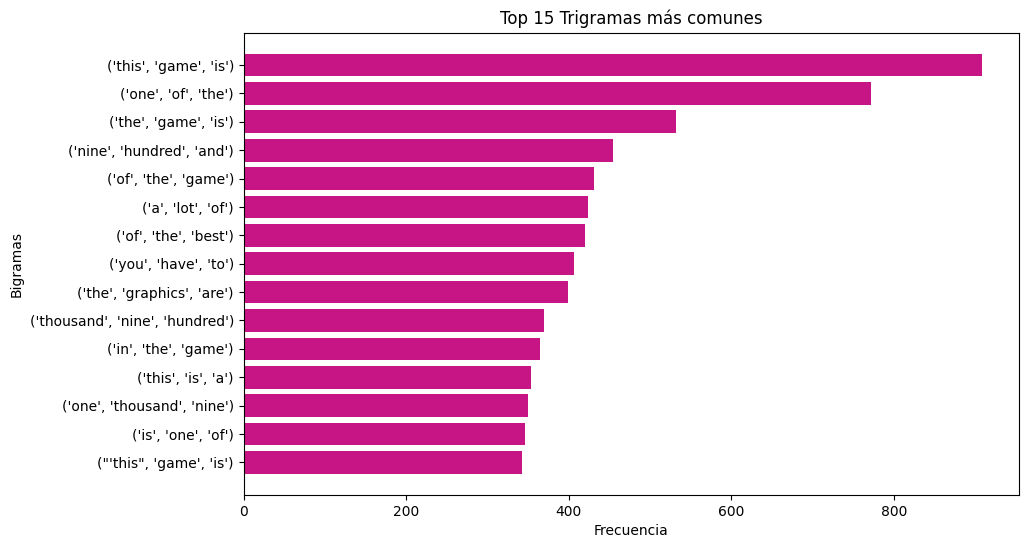

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh([str(bg[0]) for bg in trigrams_common], [bg[1] for bg in trigrams_common], color='mediumvioletred')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.title('Top 15 Trigramas más comunes')
plt.gca().invert_yaxis()
plt.show()

Se analiza los trigramas sin stopwords.

In [ ]:
trigramas_clean = list(ngrams(word_no_sw_list, 3))

In [ ]:
len(trigramas_clean)

413655

In [ ]:
trigramas_clean[:15]

[("['i", 'love', 'game'),
 ('love', 'game', 'product'),
 ('game', 'product', 'bought'),
 ('product', 'bought', 'effective'),
 ('bought', 'effective', 'im'),
 ('effective', 'im', 'happy'),
 ('im', 'happy', 'recommend'),
 ('happy', 'recommend', 'anyone'),
 ('recommend', 'anyone', 'wants'),
 ('anyone', 'wants', "it',"),
 ('wants', "it',", "'works"),
 ("it',", "'works", 'described'),
 ("'works", 'described', 'good'),
 ('described', 'good', 'condition'),
 ('good', 'condition', 'charged')]

In [ ]:
trigrams_freq_clean = FreqDist(trigramas_clean)
trigrams_clean_common = trigrams_freq_clean.most_common(15)
trigrams_clean_common

[(('thousand', 'nine', 'hundred'), 369),
 (('one', 'thousand', 'nine'), 350),
 (('super', 'mario', 'sixtyfour'), 165),
 (('one', 'best', 'games'), 116),
 (('game', 'boy', 'color'), 112),
 (('nine', 'hundred', 'ninetyeight'), 103),
 (('best', 'game', 'ever'), 102),
 (('nine', 'hundred', 'ninetynine'), 83),
 (('zelda', 'ocarina', 'time'), 76),
 (("'i", 'love', 'game'), 72),
 (('super', 'mario', 'bros'), 71),
 (('nine', 'hundred', 'ninetysix'), 71),
 (('game', 'ever', 'played'), 70),
 (('three', 'hundred', 'sixty'), 65),
 (('best', 'games', 'ever'), 63)]

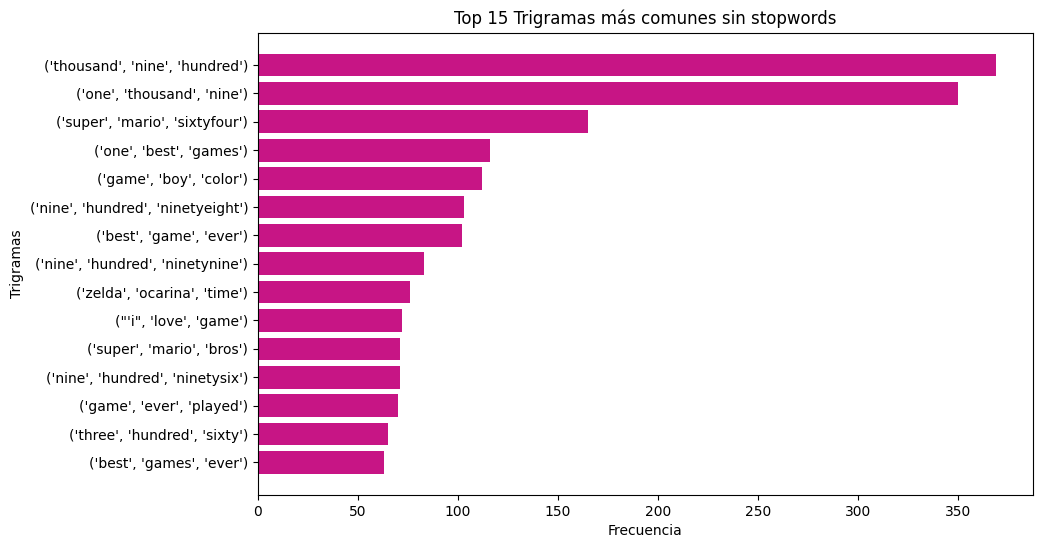

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh([str(bg[0]) for bg in trigrams_clean_common], [bg[1] for bg in trigrams_clean_common], color='mediumvioletred')
plt.xlabel('Frecuencia')
plt.ylabel('Trigramas')
plt.title('Top 15 Trigramas más comunes sin stopwords')
plt.gca().invert_yaxis()
plt.show()

## Nubes de palabras

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(' '.join(text))
    plt.figure( figsize=(16,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

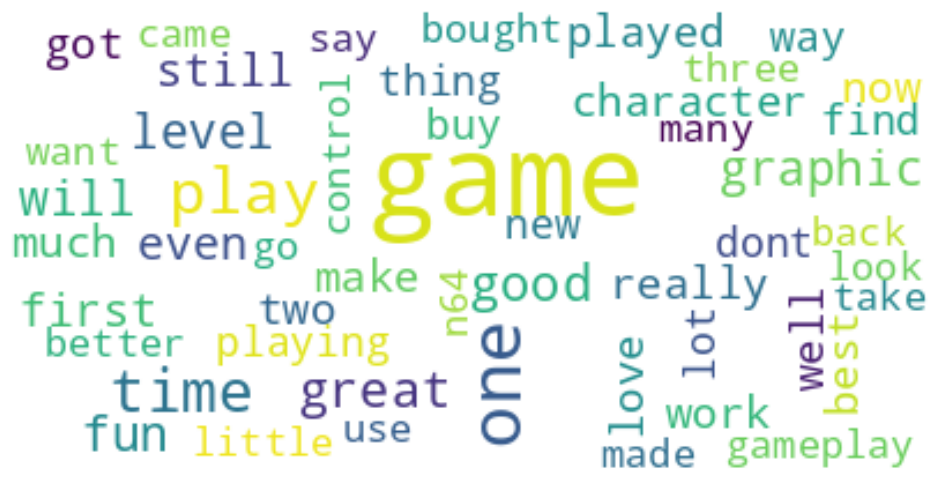

In [ ]:
plot_word_cloud(words)

***Wordcloud sin stopwords***

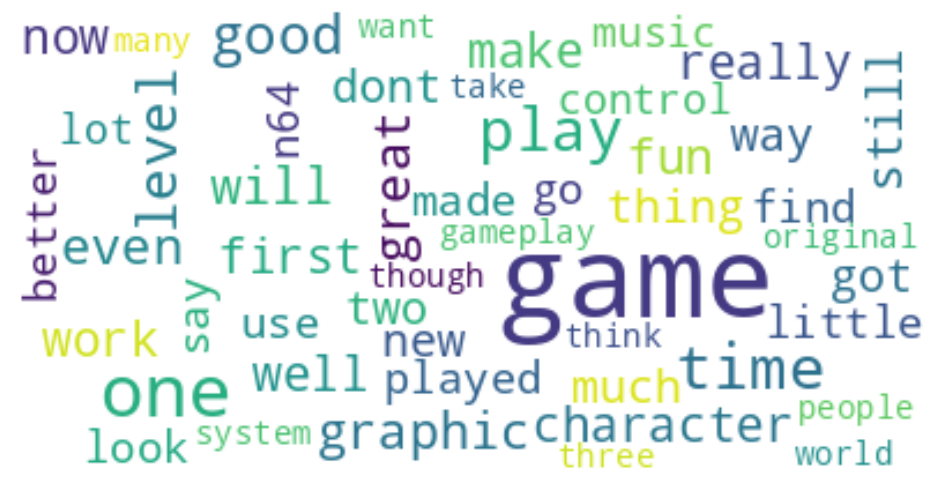

In [ ]:
plot_word_cloud(word_no_sw_list)

## Visualización en 2 dimensiones de algunos word embeddings calculados con Word2Vec

(Elegir 4-5 palabras y pintar las top 10 más similares)

Hiperparametros:

Algunos de los hiperparámetros que a tener en cuenta y configurar:

* size: dimensionalidad de las palabras vector. Cuanto mayor sea el tamaño, mejor será la representación única que obtendremos de esa palabra en el espacio vectorial.

* window: ventana para obtener el contexto de cada palabra. Se mide en número de palabras máximo entre la palabra actual y la palabra a predecir.

* min_count: frecuencia mínim a de aparición de una palabra para que sea considerada en el entrenamiento.

* sg: algoritmo escogido.
  - Skip-Gram: Durante el entrenamiento, el modelo intenta predecir el contexto (palabras circundantes) de una palabra dada. La palabra de entrada es la dada, y las palabras de salida son su contexto.
  - CBOW: Es un método de entrenamiento que intenta adivinar la palabra que se está tratando de predecir. Dado el contexto, omite la palabra actual para predecirla, optimizando así su rendimiento. Rellena los espacios en blanco en las frases prediciendo las palabras que podrían ocupar esos lugares.

* hs: Selecciona si se utilizará softmax jerárquico o negative sampling para la optimización. Negative sampling, durante el entrenamiento, omite aleatoriamente las palabras muy comunes en el texto para evitar el sobreajuste de los modelos.

* negative: El valor indica el número de "palabras ruidosas" se incluirán (usual entre 5-20 para datasets pequeños, entre 2-5 para datasets grandes).


In [ ]:
corpus = data['reviewText'].str.split()

***Skip-Gram***

Se definen los parámetros del modelo.

In [ ]:
parametros = {
    'vector_size': 500,
    'window': 20,
    'min_count': 5,
    'sg': 1,
    'hs': 0,
    'negative': 10
}

Construcción del vocabulario y obtención de las claves del vocabulario.

In [ ]:
w2v_model = Word2Vec(**parametros)

w2v_model.build_vocab(corpus)

vocab_keys = w2v_model.wv.key_to_index

print('Tamaño del vocabulario:', len(vocab_keys))

Tamaño del vocabulario: 6344


Se entrenan los pesos de los embeddings:

In [ ]:
w2v_model.train(corpus, total_examples=w2v_model.corpus_count, epochs=10)

(5264220, 7660270)

Durante el entrenamiento del modelo w2v_model se han procesado un total de 5264220 palabras en el corpus de texto de entrada y el modelo tiene un vocabulario compuesto por 7660270 palabras únicas.

Se guarda el modelo:

In [ ]:
w2v_model.save('w2v_model')

***CBOW***

Se definen los parámetros del modelo.

In [ ]:
cbow_parametros = {
    'vector_size': 500,
    'window': 20,
    'min_count': 5,
    'sg': 0,
    'hs': 1,
    'negative': 0
}

Construcción del vocabulario y obtención de las claves del vocabulario.

In [ ]:
w2v_model_cbow = Word2Vec(**cbow_parametros)

w2v_model_cbow.build_vocab(corpus)

vocab_keys = w2v_model_cbow.wv.key_to_index

print('Tamaño del vocabulario', len(vocab_keys))


Tamaño del vocabulario 6344


In [ ]:
w2v_model_cbow.train(corpus, total_examples=w2v_model_cbow.corpus_count, epochs=10)

(5264971, 7660270)

Durante el entrenamiento del modelo w2v_model_cbow se han procesado un total de 5264971 palabras en el corpus de texto de entrada y el modelo tiene un vocabulario compuesto por 7660270 palabras únicas.

Se guarda el modelo.

In [ ]:
w2v_model_cbow.save('w2v_model_cbow')

Ambos modelos tienen un vocabulario similar, con una ligera diferencia en el número total de palabras capturadas.

***Palabras similares***

In [ ]:
def similar_words(word, model1, model2):
    query = f"Most similar to {word}"
    print(query)
    print("-" * len(query))

    for sim1, sim2 in zip(model1.wv.most_similar(word), model2.wv.most_similar(word)):
        print(f"{sim1[0]:<20}{sim1[1]:.3f}{' '*10}{sim2[0]:<20}{sim2[1]:.3f}")

    print()

In [ ]:
similar_words('game', w2v_model, w2v_model_cbow)
similar_words('graphic', w2v_model, w2v_model_cbow)
similar_words('character', w2v_model, w2v_model_cbow)
similar_words('level', w2v_model, w2v_model_cbow)


Most similar to game
--------------------
it                  0.583          masterpiece         0.341
iti                 0.567          gamebut             0.314
tire                0.555          it                  0.309
this                0.550          agree               0.302
and                 0.542          videogames          0.289
exellent            0.541          gamer               0.287
experiance          0.530          games               0.286
dang                0.528          talkin              0.286
soooooo             0.518          regarded            0.285
i                   0.518          nights              0.271

Most similar to graphic
-----------------------
frankly             0.494          stunning            0.523
archaic             0.479          appeal              0.492
excessive           0.475          choppy              0.478
experiance          0.451          superior            0.469
scenes              0.442          intriguing          

Se crea el cluster de palabras con las mas similares a las dadas.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
keys = ['game', 'graphic', 'character', 'level']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
print(word_clusters)

[['it', 'iti', 'tire', 'this', 'and', 'exellent', 'experiance', 'dang', 'soooooo', 'i'], ['frankly', 'archaic', 'excessive', 'experiance', 'scenes', 'polish', 'tire', 'subpar', 'designing', 'differnt'], ['hisher', 'characters', 'gains', 'sfa3', 'personalities', 'spoken', 'abilities', 'akuma', 'technique', 'masters'], ['levels', 'earning', 'crates', 'progressing', 'thatll', 'gathering', 'mon', 'slippery', 'crate', 'hog']]


Se reduce la dimensionalidad a 2D para poder representar.

In [ ]:
tsne_model_2d = TSNE(perplexity=20, n_components=2, init='pca', n_iter=3500, random_state=32)

In [ ]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [ ]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

Visualización

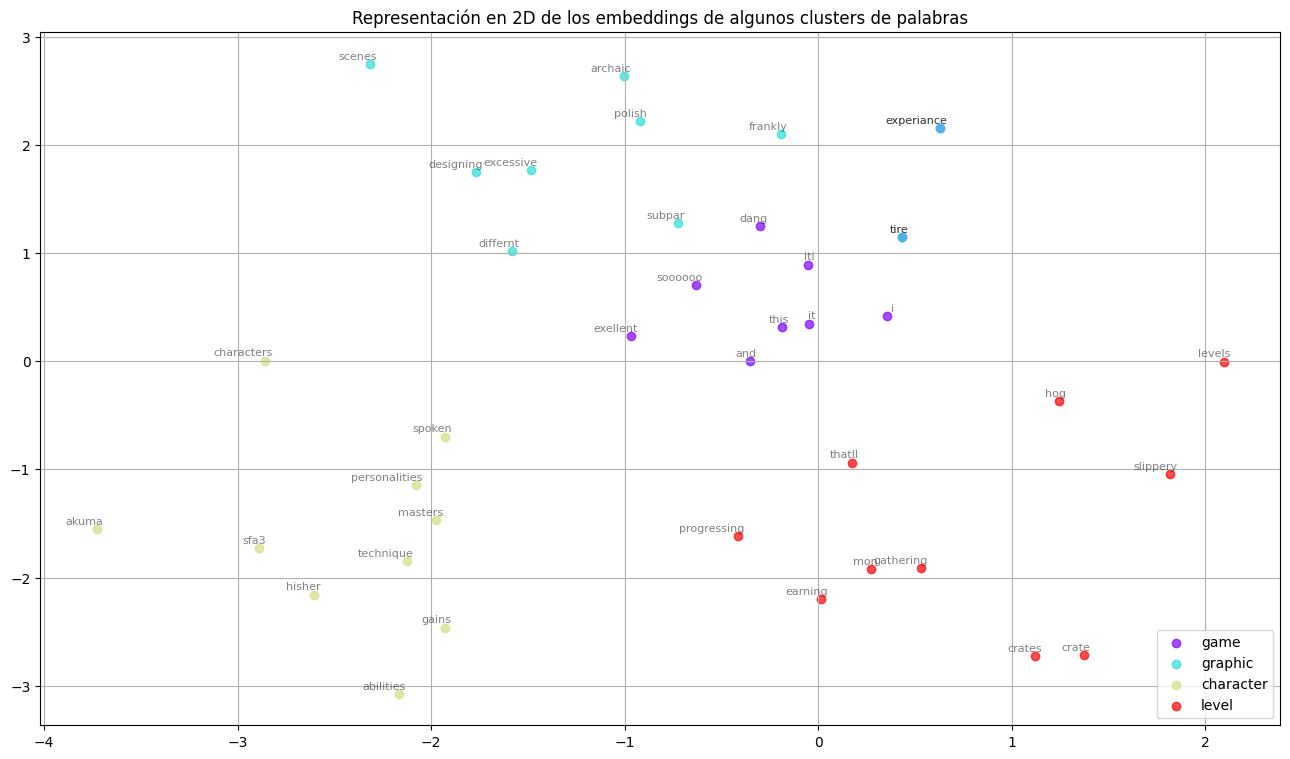

In [ ]:
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

Resalta la cercanía de los topics 'game' y 'graphic'.

In [ ]:
data.to_csv('data_reviews.csv', index=False)

In [ ]:
data = pd.read_csv('data_reviews.csv')

In [ ]:
data.head()

,reviewText,overall,Class
0,i love this game and the product i bought is e...,5,1
1,works as described good condition charged devi...,5,1
2,ill start with the goods first of all its nice...,4,1
3,played this game with my kids many yrs ago lov...,5,1
4,i bought this as a gift for my girlfriend she ...,4,1
